# Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. 
Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Domain:
Banking

# Context:
Leveraging customer information is paramount for most businesses.In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

# Attribute Information:

1. age (numeric)
2. job : 
   type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : 
   marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). 
    Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
    Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
    Thus, this input should only be included for benchmark purposes and should be discarded 
    if the intention is to have a realistic predictive model.
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: 
    number of days that passed by after the client was last contacted from a previous campaign 
    (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary: "yes","no")

# Learning Outcomes:

1. Exploratory Data Analysis
2. Preparing the data to train a model
3. Training and making predictions using an Ensemble Model
4. Tuning an Ensemble model

# Objective:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Steps and tasks:

1. Import the necessary libraries (2.5 marks)
2. Read the data as a data frame (2.5 marks)
3. Perform basic EDA which should include the following and print out your insights at every step. (15 marks)
   a. Shape of the data (2 marks)
   b. Data type of each attribute (2 marks)
   c. Checking the presence of missing values (4 marks)
   d. 5 Point summary of numerical attributes (3 marks)
   e. Checking the presence of outliers (4 marks)
4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (15 marks)
5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. (15 marks)
6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. (15 marks)
7. Compare performances of all the models (5 marks)

# References:
1. Data analytics use cases in Banking
2. Machine Learning for Financial Marketing

In [1]:
#import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import datasets


In [2]:
#importing the dataset
bank_df = pd.read_csv('bank-full.csv')

In [3]:
#read the dataset
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#read the datatype of dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_df.shape

(45211, 17)

In [6]:
#To check if na values
bank_df.isna().apply(pd.value_counts)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


In [7]:
#To check if null values
bank_df.isnull().apply(pd.value_counts)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


# No non-numeric or null values from the above validation

In [8]:
#checking 5 point summary
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
bank_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


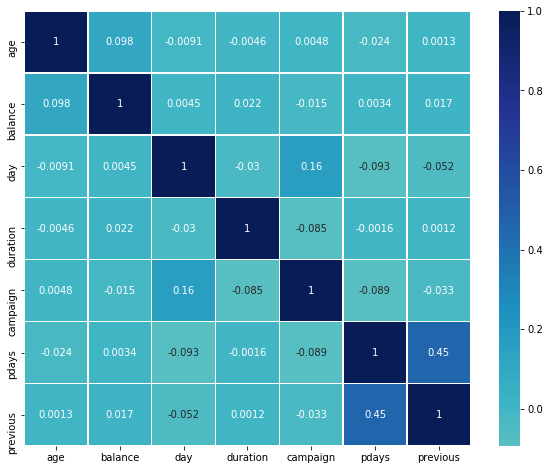

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu")
plt.show()

not many have a correlation. we can look at the spread of the data for some of the key numeric datas and see if they need to be part of the model or not

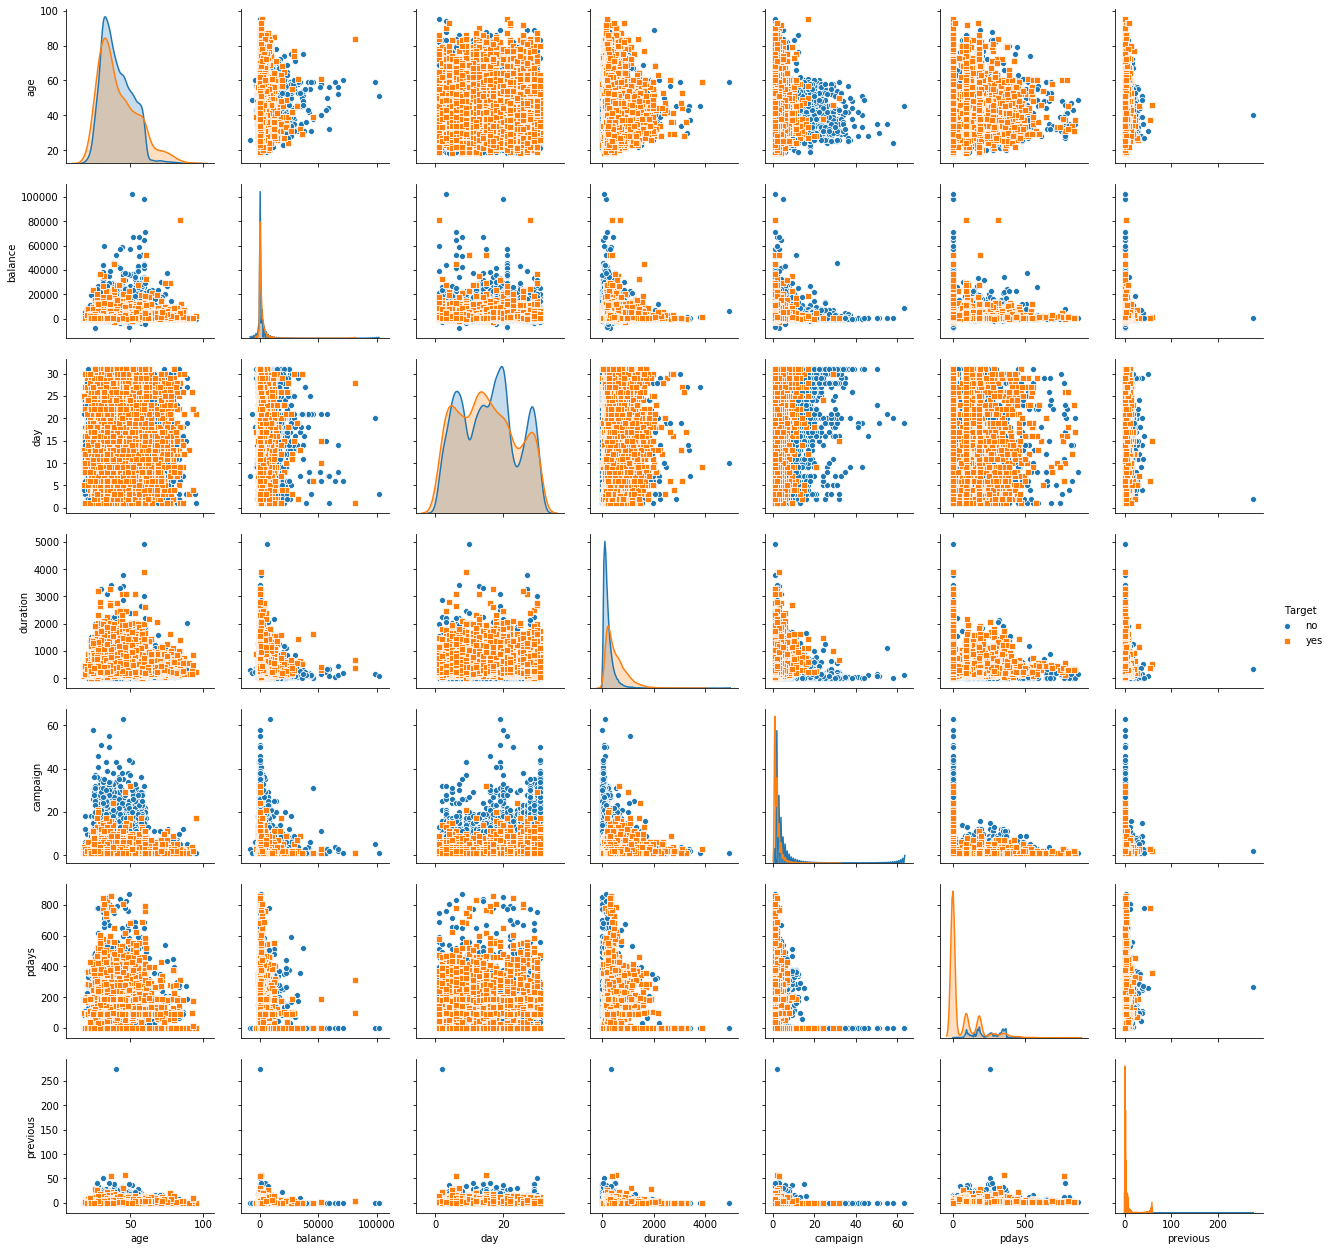

In [11]:
 g = sns.pairplot(bank_df, hue="Target", markers=["o", "s"])

1. There are high skewness in the diagonals.
2. Cant find any significance coorelation among the variables

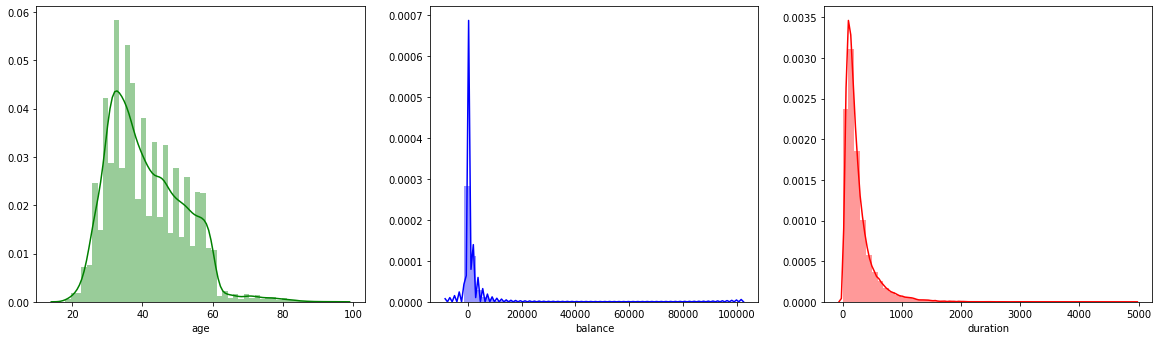

In [12]:
plt.figure(figsize=[20,25])
plt.subplot(4,3,1)
sns.distplot(bank_df['age'],kde = True,color='g')
plt.subplot(4,3,2)
sns.distplot(bank_df['balance'],kde = True,color='b')
plt.subplot(4,3,3)
sns.distplot(bank_df['duration'],kde = True,color='r')
plt.show()


Skewness is very high in balance and duration variable, whereas age is also skewed and spread across mostly between 20 to 60. 
as per the problem statement column duration is highly influential to the target. henceforth we will drop column duration. 

In [13]:
from sklearn import preprocessing
bank_df_balance = pd.DataFrame({'balance':preprocessing.scale(bank_df['balance'])})

In [14]:
bank_df_balance.head()

,balance
0,0.256419
1,-0.437895
2,-0.446762
3,0.047205
4,-0.447091


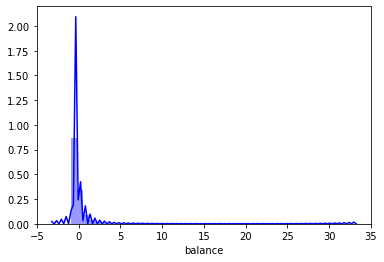

In [15]:
sns.distplot(bank_df_balance['balance'],kde = True,color='b')
plt.show()

skewness is still existent

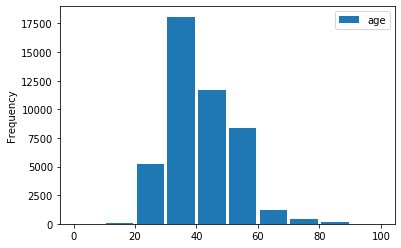

In [16]:
bank_df[['age']].plot(kind='hist',bins=[0,10,20,30,40,50,60,70,80,90,100],rwidth=0.9,)
plt.show()


People of age greater than 20 and lesser than 60 are in higher numbers. We can further drill down in comparing age vs Target variable and how age is a factor for balance 

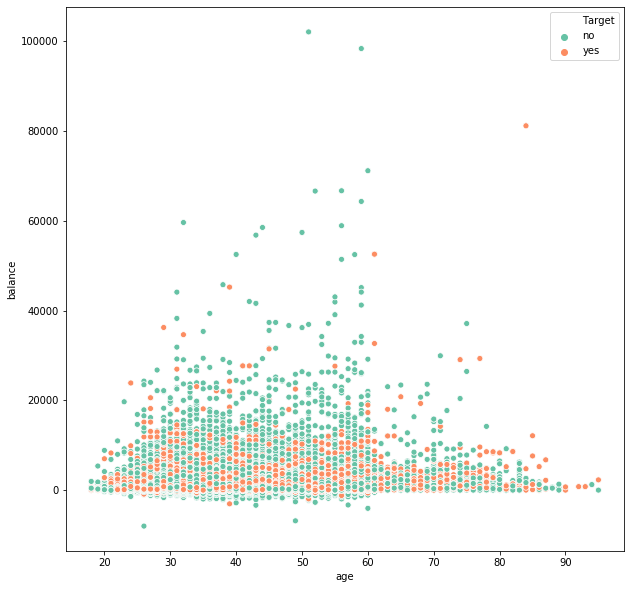

In [17]:
#scatter plot between age and balance
plt.figure(figsize=[10,10])
sns.scatterplot(x="age",y=bank_df["balance"],data=bank_df,hue='Target',palette='Set2')
plt.show()

1. This scatter plot indicates that people with lesser balance take term deposits with more orange clustering for balances lower than 20,000. But people with negative balances dont take the term deposits
2. Additionally more people are taking term deposits between the age of 60 to 90. 
3. Balance is lesser during younger age (ie between 20-30), higher in the age group of 30 - 60, and lower after 60
4. We can probably cluster like balance negative balances as -1, 0 to 20k as 1, 20k - 40k as 2, 40k - 60k as 3,>60k as 4

Skewness is very high in campaign, pdays and previous. maximum frequency of pdays and previous varaible are 0. 


In [18]:
#lets look at the distribution of job and education against the target variable
print(bank_df.job.value_counts())
print(bank_df.education.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


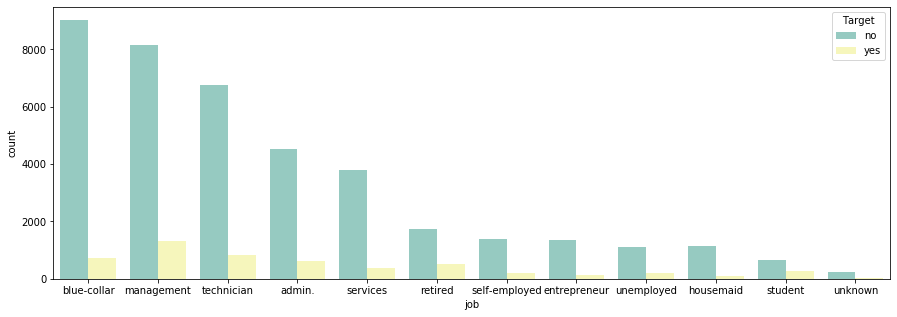

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(data = bank_df, x= 'job', order = bank_df['job'].value_counts().index, hue='Target',palette = 'Set3') 
plt.show()

More indication of people who are in blue collar/mgmt/technician/admin and less people who are unemployed/housemaid/student/unknown.

In [20]:
#lets see the percentage of type of job versus our target and see which job people will take the term deposits more
job_vs_target = pd.crosstab(bank_df['Target'],bank_df['job']).apply(lambda x: x/x.sum() * 100)
job_vs_target = job_vs_target.transpose()
job_vs_target

Target,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


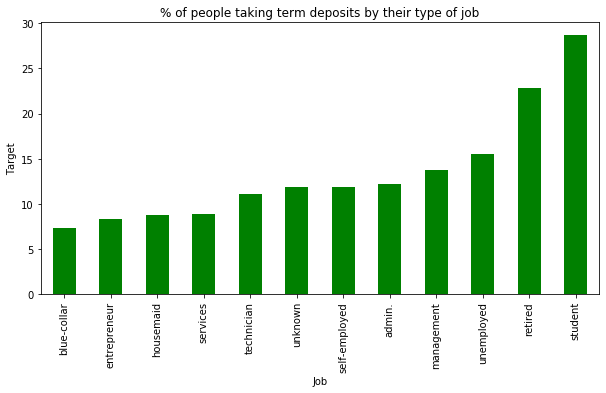

In [21]:
#lets plot them and see the same data
plot_job = job_vs_target['yes'].sort_values(ascending = True).plot(kind = 'bar',figsize = (10,5),color = "Green")   
plt.title('% of people taking term deposits by their type of job')
plt.xlabel('Job')
plt.ylabel('Target')
plt.show()

1. Students and retired and unemployed take more term deposits than other professional job holders
2. blue collar has least conversions of taking term deposits


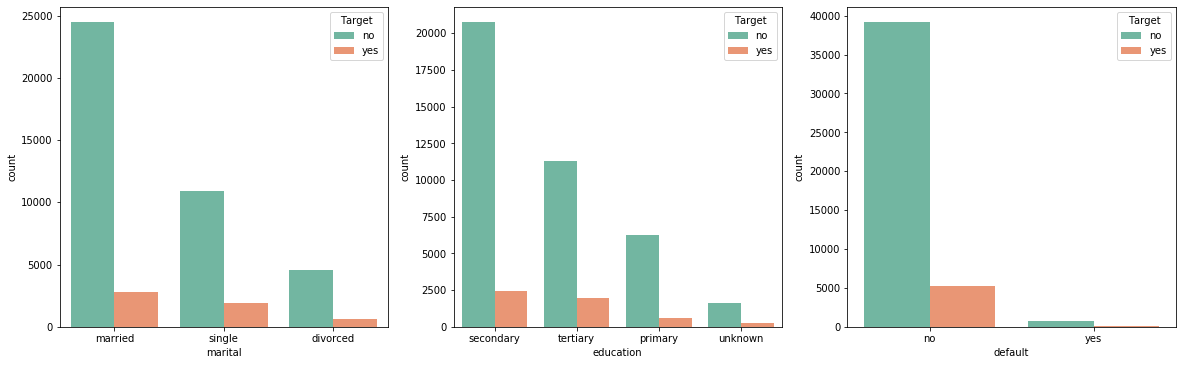

In [22]:
fig, ax = plt.subplots(figsize=(20,20))
plt.subplot(3,3,1)
ax=sns.countplot(data = bank_df, x= 'marital', order = bank_df['marital'].value_counts().index,palette = "Set2",hue="Target") 
plt.subplot(3,3,2)
ax=sns.countplot(data = bank_df, x= 'education', order = bank_df['education'].value_counts().index,palette = "Set2",hue="Target") 
plt.subplot(3,3,3)
ax=sns.countplot(data = bank_df, x= 'default', order = bank_df['default'].value_counts().index,palette = "Set2",hue="Target") 
plt.show()

1. married people are more than single or divorced. 
2. High number of people have completed secondary education. 
3. Very few people have have defaulted the credit.
4. marital and education can be converted to numeric, whereas default can be one hot encoded for categorical type


In [23]:
#lets see the percentage of type of marital versus our target and 
#see whether marriage status has an impact to term deposit acceptance
marital_vs_target = pd.crosstab(bank_df['Target'],bank_df['marital']).apply(lambda x: x/x.sum() * 100)
marital_vs_target = marital_vs_target.transpose()
marital_vs_target

Target,no,yes
marital,,
divorced,88.054542,11.945458
married,89.876534,10.123466
single,85.050821,14.949179


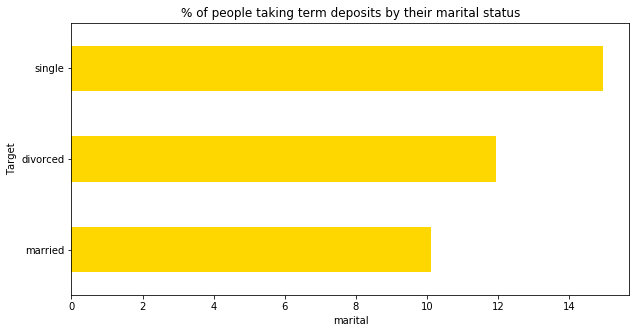

In [24]:
plot_marital = marital_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5),color = "gold")   
plt.title('% of people taking term deposits by their marital status')
plt.xlabel('marital')
plt.ylabel('Target')
plt.show()

Single people have higher term deposit conversions than married or divorced. 


In [25]:
#lets see the percentage of type of education versus our target and 
#see whether education has an impact to term deposit acceptance
edu_vs_target = pd.crosstab(bank_df['Target'],bank_df['education']).apply(lambda x: x/x.sum() * 100)
edu_vs_target = edu_vs_target.transpose()
edu_vs_target

Target,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


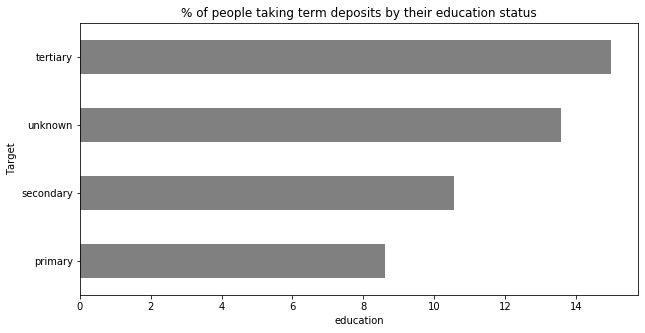

In [26]:
plot_edu = edu_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5),color = "grey")   
plt.title('% of people taking term deposits by their education status')
plt.xlabel('education')
plt.ylabel('Target')
plt.show()

People who have tertiary education and unknown have higher term deposit conversions

In [27]:
#lets see the percentage of defaulters versus our target and see whether defaulters have an impact to term deposit acceptance
def_vs_target = pd.crosstab(bank_df['Target'],bank_df['default']).apply(lambda x: x/x.sum() * 100)
def_vs_target = def_vs_target.transpose()
def_vs_target

Target,no,yes
default,,
no,88.203892,11.796108
yes,93.619632,6.380368


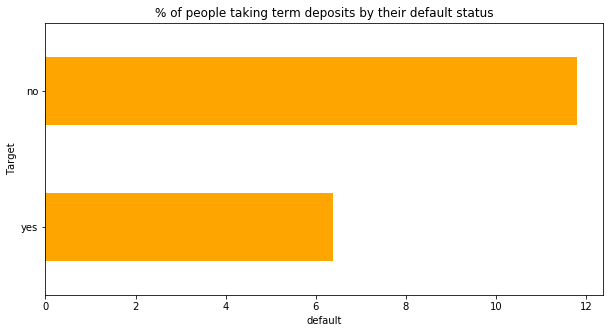

In [28]:
plot_def = def_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5),color = "orange")   
plt.title('% of people taking term deposits by their default status')
plt.xlabel('default')
plt.ylabel('Target')
plt.show()

Non-Defaulters have higher percentage of term deposit conversions. 

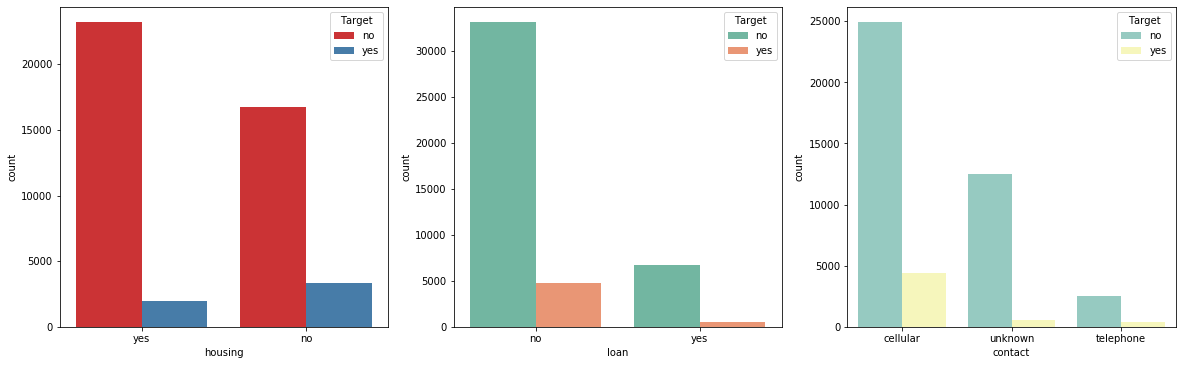

In [29]:
fig, ax = plt.subplots(figsize=(20,20))
plt.subplot(3,3,1)
ax=sns.countplot(data = bank_df, x= 'housing', order = bank_df['housing'].value_counts().index,palette = "Set1",hue='Target') 
plt.subplot(3,3,2)
ax=sns.countplot(data = bank_df, x= 'loan', order = bank_df['loan'].value_counts().index,palette = "Set2",hue='Target') 
plt.subplot(3,3,3)
ax=sns.countplot(data = bank_df, x= 'contact', order = bank_df['contact'].value_counts().index,palette = "Set3",hue='Target') 
plt.show()

1. More people are having housing loan and more people are taking term deposits who don't have a housing loan.
2. More people dont have personal loan and are taking term deposits.
3. People are more contacted through cellular and are likely to take term deposits. 
4. Type of contact "unknown" is higher than telephone
5. Housing and loan variable can be one hot encoded for categorical type

In [30]:
#lets see the percentage of people with housing loan versus our target 
#and see whether they have an impact to term deposit acceptance
house_vs_target = pd.crosstab(bank_df['Target'],bank_df['housing']).apply(lambda x: x/x.sum() * 100)
house_vs_target = house_vs_target.transpose()
house_vs_target

Target,no,yes
housing,,
no,83.297645,16.702355
yes,92.300040,7.699960


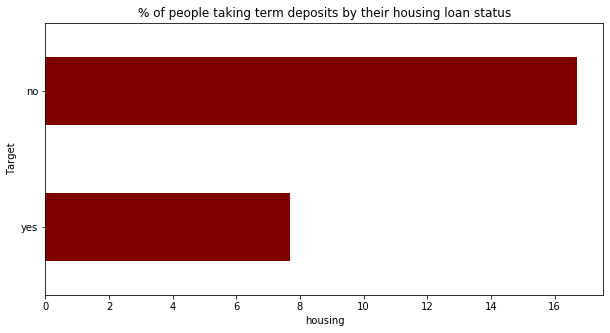

In [31]:
plot_house = house_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5),color = "maroon")   
plt.title('% of people taking term deposits by their housing loan status')
plt.xlabel('housing')
plt.ylabel('Target')
plt.show()

People who havent taken housing loan have higher percentage conversion of term deposits

In [32]:
#lets see the percentage of people with personal loan versus our target 
#and see whether they have an impact to term deposit acceptance
loan_vs_target = pd.crosstab(bank_df['Target'],bank_df['loan']).apply(lambda x: x/x.sum() * 100)
loan_vs_target = loan_vs_target.transpose()
loan_vs_target

Target,no,yes
loan,,
no,87.344273,12.655727
yes,93.318609,6.681391


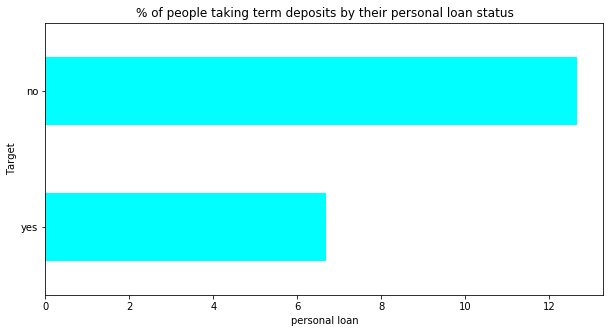

In [33]:
plot_loan = loan_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5),color = "aqua")   
plt.title('% of people taking term deposits by their personal loan status')
plt.xlabel('personal loan')
plt.ylabel('Target')
plt.show()

Again people who dont have a personal loan are expected to take term deposits

In [34]:
#lets see the percentage of people with their way of contact versus our target 
#and see whether they have an impact to term deposit acceptance
contact_vs_target = pd.crosstab(bank_df['Target'],bank_df['contact']).apply(lambda x: x/x.sum() * 100)
contact_vs_target = contact_vs_target.transpose()
contact_vs_target

Target,no,yes
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509
unknown,95.929339,4.070661


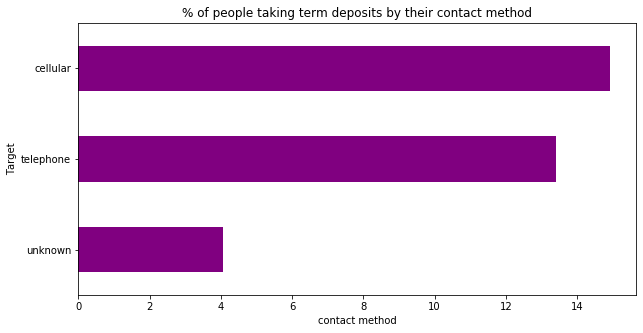

In [35]:
plot_contact = contact_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,5),color = "purple")   
plt.title('% of people taking term deposits by their contact method')
plt.xlabel('contact method')
plt.ylabel('Target')
plt.show()

People contacted through cellular having higher percentage of term deposit conversions

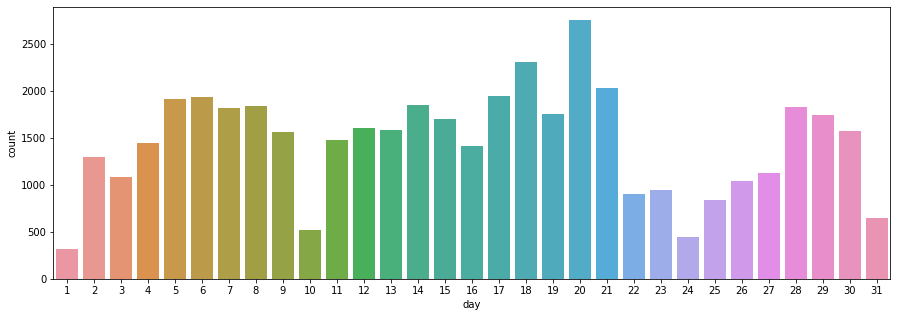

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(data = bank_df, x= 'day') 
plt.show()

1. There seems to be a uniformity for every 10 days of a month. 
2. For example, there are high number of calls made between 11th to 20th of a month. 



In [37]:
#lets see the percentage of people with their day of contact versus our target 
#and see whether they have an impact to term deposit acceptance
day_vs_target = pd.crosstab(bank_df['Target'],bank_df['day']).apply(lambda x: x/x.sum() * 100)
day_vs_target = day_vs_target.transpose()
day_vs_target

Target,no,yes
day,,
1,72.049689,27.950311
2,85.924207,14.075793
3,83.503244,16.496756
4,84.083045,15.916955
5,88.743455,11.256545
6,90.631470,9.368530
7,91.359384,8.640616
8,89.087948,10.912052
9,88.532992,11.467008


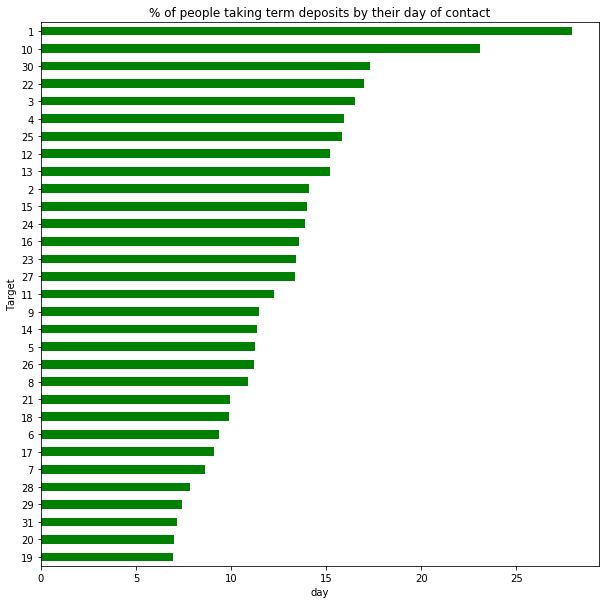

In [38]:
plot_day = day_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,10),color = "green")   
plt.title('% of people taking term deposits by their day of contact')
plt.xlabel('day')
plt.ylabel('Target')
plt.show()

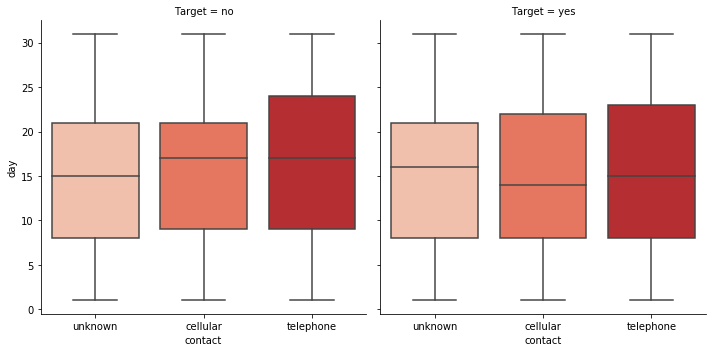

In [39]:
g = sns.FacetGrid(bank_df, col='Target', palette="Set2", height = 5, aspect = 1)
g = (g.map(sns.boxplot, "contact", "day", palette = 'Reds',order = ["unknown","cellular","telephone"]))
plt.show()

The box plot indicates that higher number of calls happens between day 10 to 25 and there is higher percentage of conversion of term deposits for telephonic customers than being contacted contacted through cellular or unknown

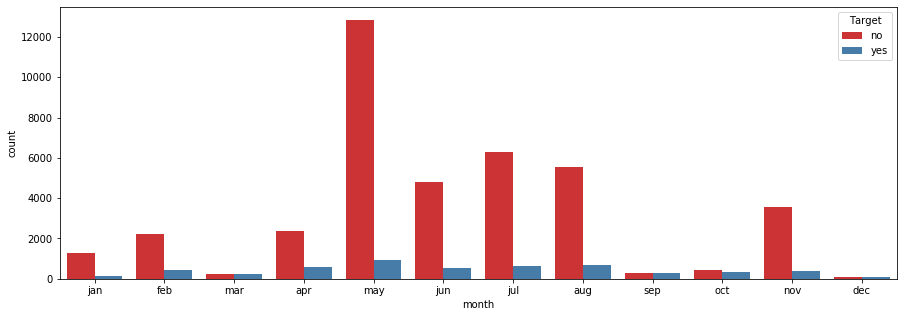

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
ax=sns.countplot(data = bank_df, x= 'month',order = order,hue='Target',palette = "Set1") 
plt.show()

There are peaks in the month of April to Aug and dips from September to March in terms people contacted. 

In [41]:
#lets see the percentage of people with their month of contact versus our target 
#and see whether they have an impact to term deposit acceptance
month_vs_target = pd.crosstab(bank_df['Target'],bank_df['month']).apply(lambda x: x/x.sum() * 100)
month_vs_target = month_vs_target.transpose()
month_vs_target

Target,no,yes
month,,
apr,80.320600,19.679400
aug,88.986714,11.013286
dec,53.271028,46.728972
feb,83.352208,16.647792
jan,89.878831,10.121169
jul,90.906454,9.093546
jun,89.777195,10.222805
mar,48.008386,51.991614
may,93.280546,6.719454


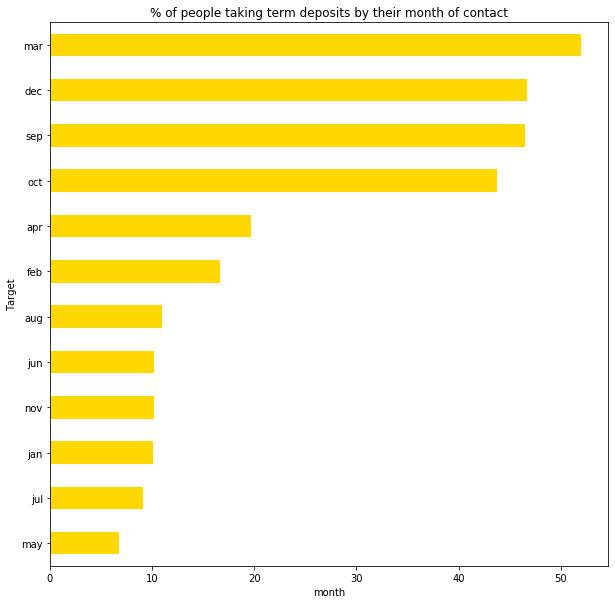

In [42]:
plot_month = month_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,10),color = "gold")   
plt.title('% of people taking term deposits by their month of contact')
plt.xlabel('month')
plt.ylabel('Target')
plt.show()

People contacted during March, December, September and October have higher percentage of term deposit conversions

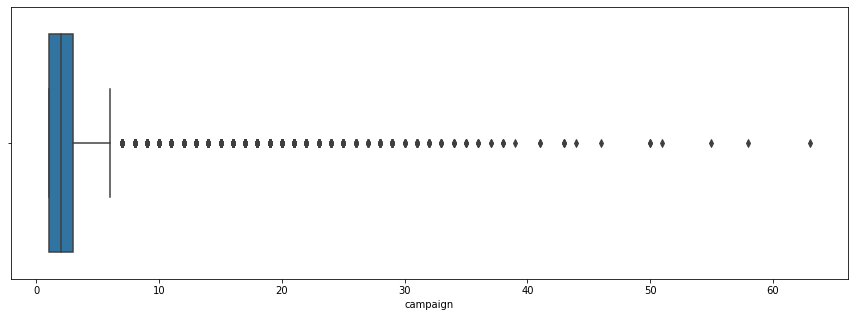

In [43]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.boxplot(data = bank_df, x= 'campaign') 
plt.show()

75% of the people are contacted less than or equal to 3 days. there are many outliers. very few people have been called more than 10 days.  

In [44]:
#lets see the percentage of people who have been contacted in this campaign versus our target 
#and see whether they have an impact to term deposit acceptance
campaign_vs_target = pd.crosstab(bank_df['Target'],bank_df['campaign']).apply(lambda x: x/x.sum() * 100)
campaign_vs_target = campaign_vs_target.transpose()
campaign_vs_target

Target,no,yes
campaign,,
1,85.402417,14.597583
2,88.796481,11.203519
3,88.806376,11.193624
4,90.999432,9.000568
5,92.120181,7.879819
6,92.873741,7.126259
7,93.605442,6.394558
8,94.074074,5.925926
9,93.577982,6.422018


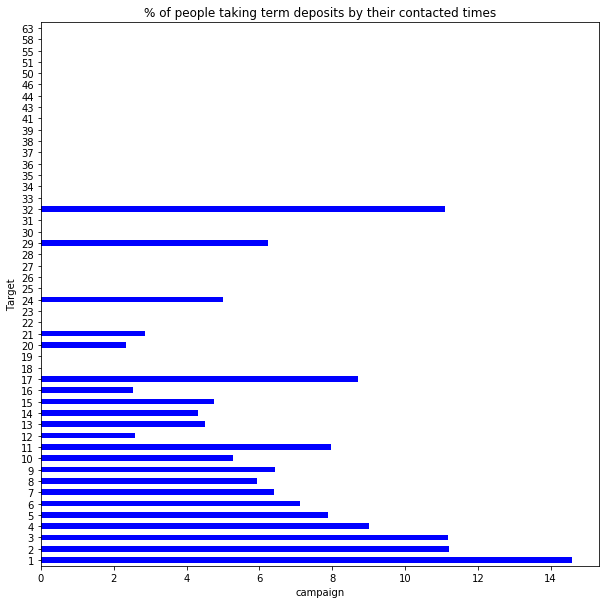

In [45]:
plot_campaign = campaign_vs_target['yes'].plot(kind = 'barh',figsize = (10,10),color = "blue")   
plt.title('% of people taking term deposits by their contacted times')
plt.xlabel('campaign')
plt.ylabel('Target')
plt.show()

1. We are clearly indicated that people who are called more than 20 times have less chance of taking the term deposits.
2. We can do a grouping of campaign days as, 1 to 10 as 1st group, 11 to 20 as 2nd group, 21 to 32 as 3rd group and rest all as 4th group

In [46]:
#lets see the percentage of people who have been last contacted  versus our target 
#and see whether they have an impact to term deposit acceptance
pdays_vs_target = pd.crosstab(bank_df['Target'],bank_df['pdays']).apply(lambda x: x/x.sum() * 100)
pdays_vs_target = pdays_vs_target.transpose()
pdays_vs_target

Target,no,yes
pdays,,
-1,90.842669,9.157331
1,60.000000,40.000000
2,94.594595,5.405405
3,100.000000,0.000000
4,50.000000,50.000000
5,100.000000,0.000000
6,90.000000,10.000000
7,100.000000,0.000000
8,100.000000,0.000000


In [47]:
#Lets see the count of pdays and group them and then look at the percentage of Yes
print(bank_df.pdays.value_counts())

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64


1. We can see that majority of the people are contacted less than one day. 
2. We also see that people contacted can be grouped by -1 to 30 days as 1 group, 31 to 60 days as 2nd group, 61 to 90 as 3rd group, greater than 90 days as 4th group

In [48]:
df3 = bank_df.loc[:,['pdays','Target']]
a = np.array(df3['pdays'].values.tolist())
df3['pdays'] = np.where(a < 30, 1, a).tolist()
a = np.array(df3['pdays'].values.tolist())
df3['pdays'] = np.where((a >= 30) & (a < 60), 2, a).tolist()
a = np.array(df3['pdays'].values.tolist())
df3['pdays'] = np.where((a >= 60) & (a < 90), 3, a).tolist()
a = np.array(df3['pdays'].values.tolist())
df3['pdays'] = np.where((a >= 90),4, a).tolist()
df3.head()
#df2['pdays'] = np.where(a < 30, 1, a).tolist()

#print(bank_df['campaign'].value_counts())

,pdays,Target
0,1,no
1,1,no
2,1,no
3,1,no
4,1,no


In [49]:
pdays_vs_target = pd.crosstab(df3['Target'],df3['pdays']).apply(lambda x: x/x.sum() * 100)
pdays_vs_target = pdays_vs_target.transpose()
pdays_vs_target

Target,no,yes
pdays,,
1,90.813387,9.186613
2,62.000000,38.000000
3,59.151194,40.848806
4,77.808508,22.191492


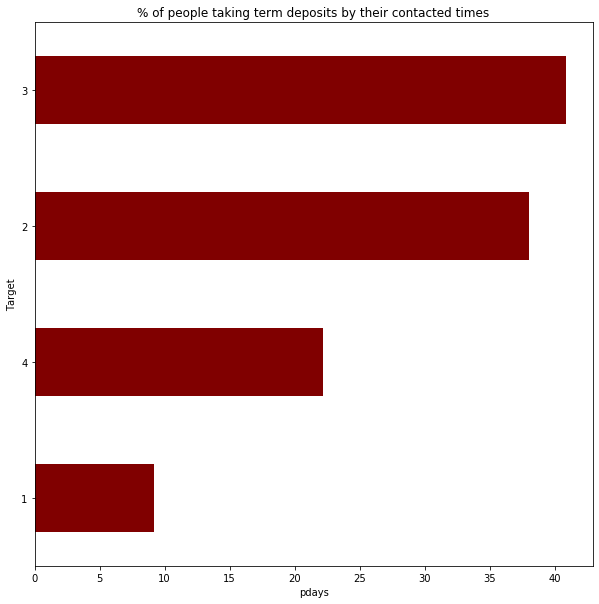

In [50]:
plot_pdays = pdays_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,10),color = "maroon")   
plt.title('% of people taking term deposits by their contacted times')
plt.xlabel('pdays')
plt.ylabel('Target')
plt.show()

People who were last contacted between 60 - 90 days have higher conversion rate of taking a term deposit

In [51]:
#lets see the percentage of people who have been previously contacted before this campaign  versus our target 
#and see whether they have an impact to term deposit acceptance
previous_vs_target = pd.crosstab(bank_df['Target'],bank_df['previous']).apply(lambda x: x/x.sum() * 100)
previous_vs_target = previous_vs_target.transpose()
previous_vs_target

Target,no,yes
previous,,
0,90.842669,9.157331
1,78.968254,21.031746
2,78.347578,21.652422
3,74.255692,25.744308
4,76.050420,23.949580
5,73.638344,26.361656
6,70.036101,29.963899
7,73.658537,26.341463
8,69.767442,30.232558


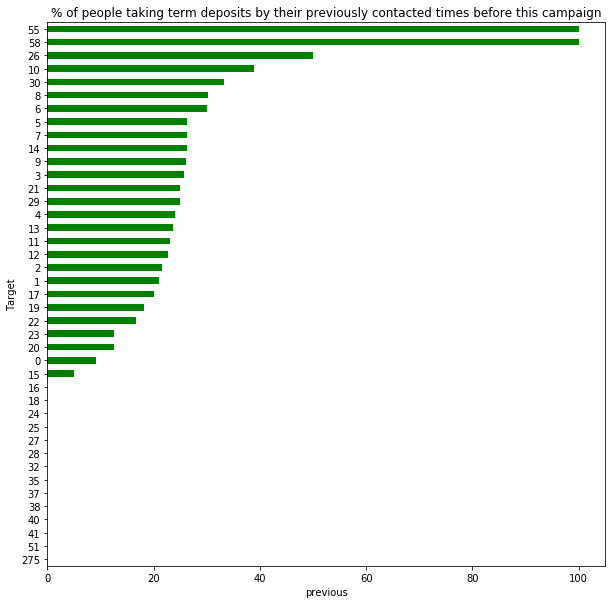

In [52]:
plot_previous = previous_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (10,10),color = "green")   
plt.title('% of people taking term deposits by their previously contacted times before this campaign')
plt.xlabel('previous')
plt.ylabel('Target')
plt.show()

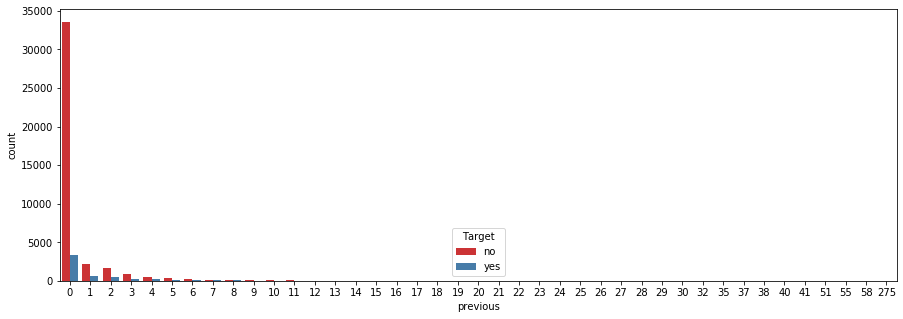

In [53]:
fig, ax = plt.subplots(figsize=(15,5))
ax=sns.countplot(data = bank_df, x= 'previous',hue='Target',palette = "Set1") 
plt.show()

It looks like majority of the people are previously contacted 10 days before this campaign. We can group them as 1group and rest others as 2nd group

In [54]:
df4 = bank_df.loc[:,['previous','Target']]
b = np.array(df4['previous'].values.tolist())
df4['previous'] = np.where(a <= 10, 1, b).tolist()
b = np.array(df4['previous'].values.tolist())
df4['previous'] = np.where(a >= 11, 2, b).tolist()
df4.head()

,previous,Target
0,1,no
1,1,no
2,1,no
3,1,no
4,1,no


In [55]:
previous_vs_target = pd.crosstab(df4['Target'],df4['previous']).apply(lambda x: x/x.sum() * 100)
previous_vs_target = previous_vs_target.transpose()
previous_vs_target

Target,no,yes
previous,,
1,90.419480,9.580520
2,77.808508,22.191492


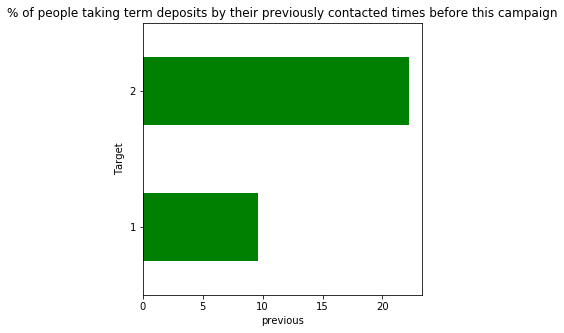

In [56]:
plot_previous = previous_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (5,5),color = "green")   
plt.title('% of people taking term deposits by their previously contacted times before this campaign')
plt.xlabel('previous')
plt.ylabel('Target')
plt.show()

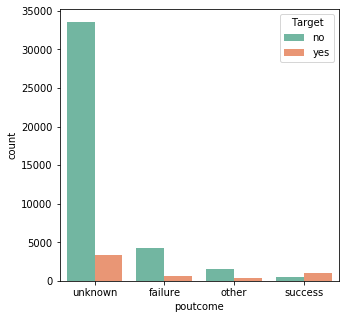

In [57]:
fig, ax = plt.subplots(figsize=(5,5))
ax=sns.countplot(data = bank_df, x= 'poutcome', order = bank_df['poutcome'].value_counts().index,palette = "Set2",hue='Target') 

In [58]:
#lets see the percentage of people who have previously taken term deposit shape up to the target
poutcome_vs_target = pd.crosstab(bank_df['Target'],bank_df['poutcome']).apply(lambda x: x/x.sum() * 100)
poutcome_vs_target = poutcome_vs_target.transpose()
poutcome_vs_target

Target,no,yes
poutcome,,
failure,87.390329,12.609671
other,83.315217,16.684783
success,35.274653,64.725347
unknown,90.838497,9.161503


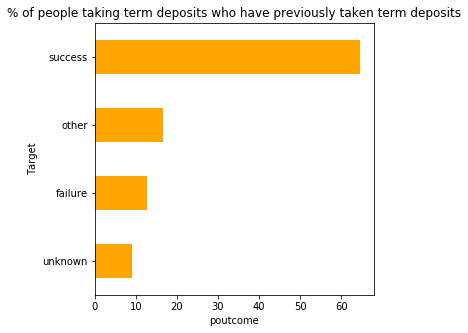

In [59]:
poutcome_vs_target = poutcome_vs_target['yes'].sort_values(ascending = True).plot(kind = 'barh',figsize = (5,5),color = "orange")   
plt.title('% of people taking term deposits who have previously taken term deposits')
plt.xlabel('poutcome')
plt.ylabel('Target')
plt.show()

Its clear indication that people have previously taken term deposits have high possibility of taking term deposits this time around

# Data Cleansing for Building the model

In [60]:
#changing the pdays variable by grouping them as 1,2,3,4
a = np.array(bank_df['pdays'].values.tolist())
bank_df['pdays'] = np.where(a < 30, 1, a).tolist()
a = np.array(bank_df['pdays'].values.tolist())
bank_df['pdays'] = np.where((a >= 30) & (a < 60), 2, a).tolist()
a = np.array(bank_df['pdays'].values.tolist())
bank_df['pdays'] = np.where((a >= 60) & (a < 90), 3, a).tolist()
a = np.array(bank_df['pdays'].values.tolist())
bank_df['pdays'] = np.where((a >= 90),4, a).tolist()


In [61]:
#changing the previous variable by grouping them as 1,2
b = np.array(bank_df['previous'].values.tolist())
bank_df['previous'] = np.where(a <= 10, 1, b).tolist()
b = np.array(bank_df['previous'].values.tolist())
df4['previous'] = np.where(a >= 11, 2, b).tolist()


In [62]:
#changing the campaign variable by grouping them as 1,2,3,4
c = np.array(bank_df['campaign'].values.tolist())
bank_df['campaign'] = np.where((c >= 1) & (c <= 10), 1, c).tolist()
c = np.array(bank_df['campaign'].values.tolist())
bank_df['campaign'] = np.where((c >= 11) & (c <= 20), 2, c).tolist()
c = np.array(bank_df['campaign'].values.tolist())
bank_df['campaign'] = np.where((c >= 21) & (c <= 32), 3, c).tolist()
c = np.array(bank_df['campaign'].values.tolist())
bank_df['campaign'] = np.where((c >= 33),4, c).tolist()

In [63]:
#changing the balance variable by grouping them as -1,1,2,3,4
d = np.array(bank_df['balance'].values.tolist())
bank_df['balance'] = np.where( d <=0, -1, d).tolist()
d = np.array(bank_df['balance'].values.tolist())
bank_df['balance'] = np.where((d >= 1) & (d <= 20000), 1, d).tolist()
d = np.array(bank_df['balance'].values.tolist())
bank_df['balance'] = np.where((d >= 20001) & (d <= 40000), 2, d).tolist()
d = np.array(bank_df['balance'].values.tolist())
bank_df['balance'] = np.where((d >= 40001) & (d <= 60000), 3, d).tolist()
d = np.array(bank_df['balance'].values.tolist())
bank_df['balance'] = np.where((d >= 60001),4, c).tolist()

In [64]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,1,yes,no,unknown,5,may,261,1,1,1,unknown,no
1,44,technician,single,secondary,no,1,yes,no,unknown,5,may,151,1,1,1,unknown,no
2,33,entrepreneur,married,secondary,no,1,yes,yes,unknown,5,may,76,1,1,1,unknown,no
3,47,blue-collar,married,unknown,no,1,yes,no,unknown,5,may,92,1,1,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,1,1,unknown,no


In [65]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [66]:
#converting the Yes/No columns into int by one hot encoding
oneHotEncodingColumns=["marital","default","housing","loan"]
bank_df=pd.get_dummies(bank_df, columns=oneHotEncodingColumns)
bank_df.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,pdays,...,Target,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,management,tertiary,1,unknown,5,may,261,1,1,...,no,0,1,0,1,0,0,1,1,0
1,44,technician,secondary,1,unknown,5,may,151,1,1,...,no,0,0,1,1,0,0,1,1,0
2,33,entrepreneur,secondary,1,unknown,5,may,76,1,1,...,no,0,1,0,1,0,0,1,0,1
3,47,blue-collar,unknown,1,unknown,5,may,92,1,1,...,no,0,1,0,1,0,0,1,1,0
4,33,unknown,unknown,1,unknown,5,may,198,1,1,...,no,0,0,1,1,0,1,0,1,0
5,35,management,tertiary,1,unknown,5,may,139,1,1,...,no,0,1,0,1,0,0,1,1,0
6,28,management,tertiary,1,unknown,5,may,217,1,1,...,no,0,0,1,1,0,0,1,0,1
7,42,entrepreneur,tertiary,1,unknown,5,may,380,1,1,...,no,1,0,0,0,1,0,1,1,0
8,58,retired,primary,1,unknown,5,may,50,1,1,...,no,0,1,0,1,0,0,1,1,0
9,43,technician,secondary,1,unknown,5,may,55,1,1,...,no,0,0,1,1,0,0,1,1,0


In [67]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
age                 45211 non-null int64
job                 45211 non-null object
education           45211 non-null object
balance             45211 non-null int64
contact             45211 non-null object
day                 45211 non-null int64
month               45211 non-null object
duration            45211 non-null int64
campaign            45211 non-null int64
pdays               45211 non-null int64
previous            45211 non-null int64
poutcome            45211 non-null object
Target              45211 non-null object
marital_divorced    45211 non-null uint8
marital_married     45211 non-null uint8
marital_single      45211 non-null uint8
default_no          45211 non-null uint8
default_yes         45211 non-null uint8
housing_no          45211 non-null uint8
housing_yes         45211 non-null uint8
loan_no             45211 non-null uint8
loan_yes            4521

In [68]:
replace_columns = {
                "job":{"student":1,"housemaid":2,"unemployed":3,"self-employed":4,"entrepreneur":5, "retired":6, "services":7,"admin.":8,"technician":9,"management":10,"blue-collar":11,"unknown":12},
                "education":{"primary": 1, "tertiary":3 , "secondary": 2, "unknown": 4},
                "contact":{"telephone": 1, "cellular":2 ,"unknown": 3},
                "month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                "poutcome":{"success": 1, "other": 2 ,"failure": 3, "unknown":4}
                    }

In [69]:
bank_df=bank_df.replace(replace_columns)
bank_df.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,pdays,...,Target,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,10,3,1,3,5,5,261,1,1,...,no,0,1,0,1,0,0,1,1,0
1,44,9,2,1,3,5,5,151,1,1,...,no,0,0,1,1,0,0,1,1,0
2,33,5,2,1,3,5,5,76,1,1,...,no,0,1,0,1,0,0,1,0,1
3,47,11,4,1,3,5,5,92,1,1,...,no,0,1,0,1,0,0,1,1,0
4,33,12,4,1,3,5,5,198,1,1,...,no,0,0,1,1,0,1,0,1,0
5,35,10,3,1,3,5,5,139,1,1,...,no,0,1,0,1,0,0,1,1,0
6,28,10,3,1,3,5,5,217,1,1,...,no,0,0,1,1,0,0,1,0,1
7,42,5,3,1,3,5,5,380,1,1,...,no,1,0,0,0,1,0,1,1,0
8,58,6,1,1,3,5,5,50,1,1,...,no,0,1,0,1,0,0,1,1,0
9,43,9,2,1,3,5,5,55,1,1,...,no,0,0,1,1,0,0,1,1,0


In [70]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
age                 45211 non-null int64
job                 45211 non-null int64
education           45211 non-null int64
balance             45211 non-null int64
contact             45211 non-null int64
day                 45211 non-null int64
month               45211 non-null int64
duration            45211 non-null int64
campaign            45211 non-null int64
pdays               45211 non-null int64
previous            45211 non-null int64
poutcome            45211 non-null int64
Target              45211 non-null object
marital_divorced    45211 non-null uint8
marital_married     45211 non-null uint8
marital_single      45211 non-null uint8
default_no          45211 non-null uint8
default_yes         45211 non-null uint8
housing_no          45211 non-null uint8
housing_yes         45211 non-null uint8
loan_no             45211 non-null uint8
loan_yes            45211 non

In [71]:
target_replace = {"Target":{"yes": 1, "no": 0}}

In [72]:
bank_df=bank_df.replace(target_replace)
bank_df.head(10)

,age,job,education,balance,contact,day,month,duration,campaign,pdays,...,Target,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,10,3,1,3,5,5,261,1,1,...,0,0,1,0,1,0,0,1,1,0
1,44,9,2,1,3,5,5,151,1,1,...,0,0,0,1,1,0,0,1,1,0
2,33,5,2,1,3,5,5,76,1,1,...,0,0,1,0,1,0,0,1,0,1
3,47,11,4,1,3,5,5,92,1,1,...,0,0,1,0,1,0,0,1,1,0
4,33,12,4,1,3,5,5,198,1,1,...,0,0,0,1,1,0,1,0,1,0
5,35,10,3,1,3,5,5,139,1,1,...,0,0,1,0,1,0,0,1,1,0
6,28,10,3,1,3,5,5,217,1,1,...,0,0,0,1,1,0,0,1,0,1
7,42,5,3,1,3,5,5,380,1,1,...,0,1,0,0,0,1,0,1,1,0
8,58,6,1,1,3,5,5,50,1,1,...,0,0,1,0,1,0,0,1,1,0
9,43,9,2,1,3,5,5,55,1,1,...,0,0,0,1,1,0,0,1,1,0


In [73]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
age                 45211 non-null int64
job                 45211 non-null int64
education           45211 non-null int64
balance             45211 non-null int64
contact             45211 non-null int64
day                 45211 non-null int64
month               45211 non-null int64
duration            45211 non-null int64
campaign            45211 non-null int64
pdays               45211 non-null int64
previous            45211 non-null int64
poutcome            45211 non-null int64
Target              45211 non-null int64
marital_divorced    45211 non-null uint8
marital_married     45211 non-null uint8
marital_single      45211 non-null uint8
default_no          45211 non-null uint8
default_yes         45211 non-null uint8
housing_no          45211 non-null uint8
housing_yes         45211 non-null uint8
loan_no             45211 non-null uint8
loan_yes            45211 non-

In [74]:
#convert few of the columns as categorical for better model prediction
bank_df[['job','education','contact','month','poutcome','day','pdays','previous','campaign','Target','balance']] = bank_df[['job','education','contact','month','poutcome','day','pdays','previous','campaign','Target','balance']].astype('category')


In [75]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
age                 45211 non-null int64
job                 45211 non-null category
education           45211 non-null category
balance             45211 non-null category
contact             45211 non-null category
day                 45211 non-null category
month               45211 non-null category
duration            45211 non-null int64
campaign            45211 non-null category
pdays               45211 non-null category
previous            45211 non-null category
poutcome            45211 non-null category
Target              45211 non-null category
marital_divorced    45211 non-null uint8
marital_married     45211 non-null uint8
marital_single      45211 non-null uint8
default_no          45211 non-null uint8
default_yes         45211 non-null uint8
housing_no          45211 non-null uint8
housing_yes         45211 non-null uint8
loan_no             45211 non-null uin

# Feature Engineering

In [76]:
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split

In [77]:
#dropping unwanted columns for model building
copy_bank_df = bank_df.drop(['duration'],axis=1)

In [78]:
#bank_df.drop(['duration'],axis = 1)
X = copy_bank_df.loc[:, copy_bank_df.columns != 'Target']
y = copy_bank_df.loc[:, copy_bank_df.columns == 'Target']


In [79]:
X.head()

,age,job,education,balance,contact,day,month,campaign,pdays,previous,poutcome,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,10,3,1,3,5,5,1,1,1,4,0,1,0,1,0,0,1,1,0
1,44,9,2,1,3,5,5,1,1,1,4,0,0,1,1,0,0,1,1,0
2,33,5,2,1,3,5,5,1,1,1,4,0,1,0,1,0,0,1,0,1
3,47,11,4,1,3,5,5,1,1,1,4,0,1,0,1,0,0,1,1,0
4,33,12,4,1,3,5,5,1,1,1,4,0,0,1,1,0,1,0,1,0


In [80]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


# Train Test Split

In [81]:
features_arr = X.values
target_labels = y.values

In [82]:
#Train, Test split
X_train, X_test, y_train, y_test = train_test_split(features_arr, target_labels,test_size=0.7, random_state=7)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

# Logistic Modelling

In [83]:
#importing the logistic regression model
from sklearn.linear_model import LogisticRegression

In [84]:
#Build the logistic regression model
logisticmodel = LogisticRegression( solver = "liblinear")

In [85]:
logisticmodel.fit(X_train, y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
logistic_predict = logisticmodel.predict(X_test)

In [87]:
lscore = logisticmodel.score(X_train, y_train)
print(lscore)

0.8941974489419745


In [88]:
# Use score method to get accuracy of model
lscore = logisticmodel.score(X_test, y_test)
print(lscore)

0.8898508594539939


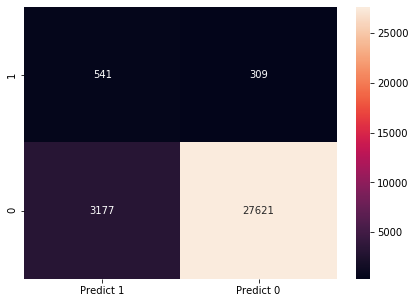

In [89]:
logcm = metrics.confusion_matrix(logistic_predict,y_test, labels=[1,0])
dflog_cm = pd.DataFrame(logcm, index = [i for i in ["1","0"]], 
                    columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(dflog_cm, annot=True, fmt = 'g')
plt.show()

# The confusion matrix for Logistic Regression¶
True Positives (TP): we correctly predicted that they will take term deposits 541

True Negatives (TN): we correctly predicted that they wont't take term deposits 27621

False Negatives (FN): we incorrectly predicted that they wont take term deposits 309

False Positive (FP): we incorrectly predicted that they will take term deposits 3177

In [90]:
print("Classification Report")
print(metrics.classification_report(y_test, logistic_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.15      0.24      3718
           0       0.90      0.99      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.77      0.57      0.59     31648
weighted avg       0.87      0.89      0.86     31648



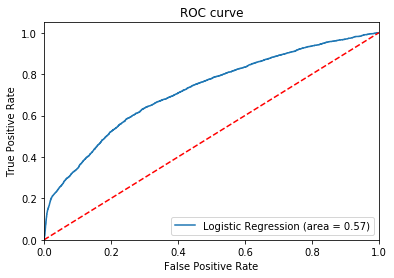

In [91]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logistic_roc_auc = roc_auc_score(y_test, logisticmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [92]:
auc_score = metrics.roc_auc_score(y_test, logisticmodel.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.72

In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': lscore})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851


Accuracy achievable is 88.98%. Precision score - 64% and recall - 15% for predicting a person would take term deposit indicates that this model can be considered and modified to attain better results. 
ROC score is also 72% which indicates that this model is good and can be modified further for the bank to predict and spend people and money to rightly campaign for those who will take term deposits

# Using Gaussian algorithm from Naive Bayes for prediction

In [94]:
# using Gaussian algorithm from Naive Bayes
from sklearn.naive_bayes import GaussianNB 

# create the model
GNB = GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
GNB_predict = GNB.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, GNB_predict)))


Model Accuracy: 0.5652


In [96]:
gscore = GNB.score(X_test,y_test)
gscore

0.5652173913043478

Confusion Matrix


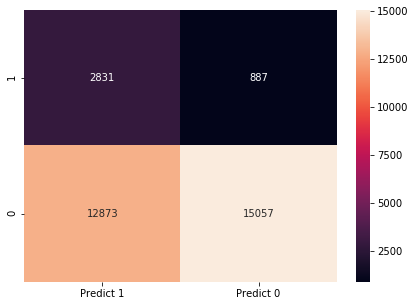

In [97]:
print("Confusion Matrix")
Ncm=metrics.confusion_matrix(y_test, GNB_predict, labels=[1, 0])
Ncm
df_Ncm = pd.DataFrame(Ncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_Ncm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for Gaussian Naive Bayes
True Positives (TP): we correctly predicted that they will take term deposits 2831

True Negatives (TN): we correctly predicted that they wont't take term deposits 15057

False Negatives (FN): we incorrectly predicted that they wont take term deposits 887

False Positive (FP): we incorrectly predicted that they will take term deposits 12873

In [98]:
print("Classification Report")
print(metrics.classification_report(y_test, GNB_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.18      0.76      0.29      3718
           0       0.94      0.54      0.69     27930

    accuracy                           0.57     31648
   macro avg       0.56      0.65      0.49     31648
weighted avg       0.85      0.57      0.64     31648



In [99]:
tempResultsDf = pd.DataFrame({'Method':['Gaussian Naive Bayes'], 'accuracy': [gscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217


Accuracy achievable is 56.52%. Precision score - 18% and recall - 76% for predicting a person would take term deposit indicates that this model is not reliable for our current problem. As per our problem greater precision score will help us not to miss out all the candidates who can be converted to take term deposits

# Using KNN Classifier for prediction

In [100]:
from sklearn.neighbors import KNeighborsClassifier


In [101]:
#identifying the right k value
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

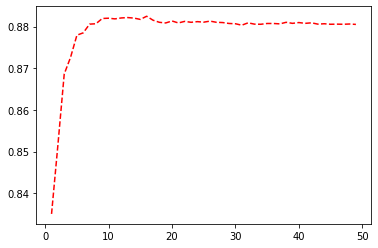

In [102]:
plt.plot(range(1,50),scores,'r--')
plt.show()

In [103]:
#accuracy is found to be increased after K> 11. With iterating around 11,13,15,17 identified K = 13 yields max accuracy
NNH = KNeighborsClassifier(n_neighbors= 13 , weights = 'distance' )

In [104]:
NNH.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [105]:
from sklearn import metrics
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, predicted_labels)))


Model Accuracy: 0.8822


Confusion Matrix


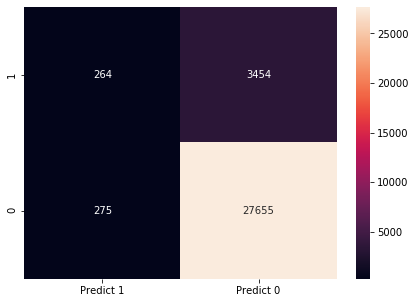

In [106]:
print("Confusion Matrix")
Knncm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
Knncm
df_cm = pd.DataFrame(Knncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for KNN Classifier
True Positives (TP): we correctly predicted that they will take term deposits 264

True Negatives (TN): we correctly predicted that they wont't take term deposits 27655

False Negatives (FN): we incorrectly predicted that they wont take term deposits 3454

False Positive (FP): we incorrectly predicted that they will take term deposits 275

In [107]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.49      0.07      0.12      3718
           0       0.89      0.99      0.94     27930

    accuracy                           0.88     31648
   macro avg       0.69      0.53      0.53     31648
weighted avg       0.84      0.88      0.84     31648



Accuracy achievable is 88.22%. Precision score - 49% and recall - 7% for predicting a person would take term deposit indicates that this model is better than Gaussian NB for our current problem. As per our problem greater precision score will help us not to miss out all the candidates who can be converted to take term deposits. But lets try to see by scaling the features 

In [108]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='distance')

In [109]:
from sklearn import metrics
predicted_labels = NNH.predict(X_test_scaled)
NNH.score(X_test_scaled, y_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, predicted_labels)))


Model Accuracy: 0.8882


Confusion Matrix


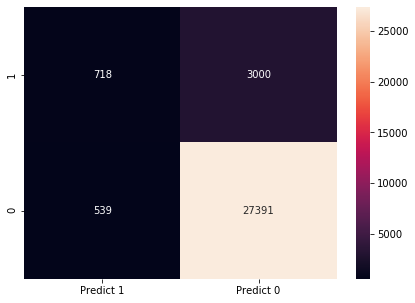

In [110]:
print("Confusion Matrix")
Knncm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
Knncm
df_cm = pd.DataFrame(Knncm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for KNN Classifier
True Positives (TP): we correctly predicted that they will take term deposits 718

True Negatives (TN): we correctly predicted that they wont't take term deposits 27391

False Negatives (FN): we incorrectly predicted that they wont take term deposits 3000

False Positive (FP): we incorrectly predicted that they will take term deposits 539

In [111]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.19      0.29      3718
           0       0.90      0.98      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.74      0.59      0.61     31648
weighted avg       0.86      0.89      0.86     31648



In [112]:
kscore = NNH.score(X_test_scaled,y_test)
kscore

0.8881761880687563

In [113]:
tempResultsDf = pd.DataFrame({'Method':['KNN'], 'accuracy': [kscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217
0,KNN,0.888176


Accuracy achievable is 88.82%. Precision score - 57% and recall - 19% for predicting a person would take term deposit indicates that this model scaledis  much better than KNN(without scaling) for our current problem. As per our problem greater precision score will help us not to miss out all the candidates who can be converted to take term deposits

# Decision Tree Model

In [114]:
#checking the Decision Tree model with Gini and entropy classifiers
from sklearn.tree import DecisionTreeClassifier
for d in ('gini','entropy'):
    dTree = DecisionTreeClassifier(criterion = d )
    dTree.fit(X_train,y_train)
    print(d)
    print(dTree.score(X_train, y_train))
    print(dTree.score(X_test, y_test))

gini
0.9953550099535501
0.8300998483316482
entropy
0.9953550099535501
0.8384732052578362


# Reducing the overfitting (Regularization)

In [115]:
for d in ('gini','entropy'):
    dTreeR = DecisionTreeClassifier(criterion = d, max_depth = 3, random_state=1,min_samples_leaf=5)
    dTreeR.fit(X_train, y_train)
    print(d)
    print(dTreeR.score(X_train, y_train))
    print(dTreeR.score(X_test, y_test))

gini
0.8965568089655681
0.8907039939332659
entropy
0.8964093489640935
0.8911779575328614


In [116]:
#Entropy model has slightly better results and going with that scores for further processing

In [117]:
#finding the optimal depth
scores =[]
for k in range(1,10):
    dTreeRs = DecisionTreeClassifier(criterion = 'entropy', max_depth = k, random_state=1,min_samples_leaf=5)
    dTreeRs.fit(X_train, y_train)
    scores.append(dTreeRs.score(X_test, y_test))

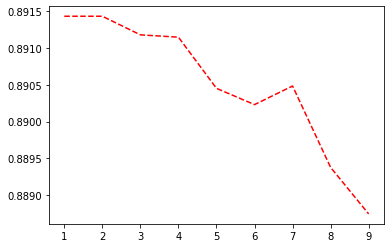

In [118]:
plt.plot(range(1,10),scores,'r--')
plt.show()

In [119]:
predicted_labels = dTreeR.predict(X_test)

Confusion Matrix


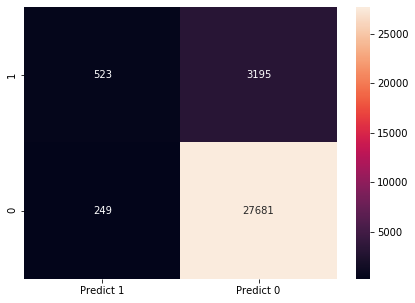

In [120]:
print("Confusion Matrix")
DTreecm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
DTreecm
df_cm = pd.DataFrame(DTreecm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for Decision Tree Classifier
True Positives (TP): we correctly predicted that they will take term deposits 523

True Negatives (TN): we correctly predicted that they wont't take term deposits 27681

False Negatives (FN): we incorrectly predicted that they wont take term deposits 3195

False Positive (FP): we incorrectly predicted that they will take term deposits 249

In [121]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.14      0.23      3718
           0       0.90      0.99      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.79      0.57      0.59     31648
weighted avg       0.87      0.89      0.86     31648



In [122]:
dscore = dTreeR.score(X_test,y_test)
dscore

0.8911779575328614

In [123]:
tempResultsDf = pd.DataFrame({'Method':['DTree'], 'accuracy': [dscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217
0,KNN,0.888176
0,DTree,0.891178


Accuracy achievable is 89.11%. Precision score - 68% and recall - 14% for predicting a person would take term deposit indicates that this model is much better than KNN(with scaling) for our current problem. As per our problem greater precision score will help us not to miss out all the candidates who can be converted to take term deposits

In [124]:
## Calculating feature importance
feature_importance = dTreeR.tree_.compute_feature_importances(normalize=False)


feature_imp_dict = dict(zip(X.columns, dTreeR.feature_importances_))
feature_imp = pd.DataFrame.from_dict(feature_imp_dict, orient='index')
feature_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.662811
contact,0.171479
age,0.103122
month,0.034097
housing_yes,0.015490
previous,0.006902
job,0.006100
balance,0.000000
marital_single,0.000000
loan_no,0.000000


poutcome, contact, age, month, housing yes, previous, job columns found to be significant in deciding if a person takes a term deposit or not

# Random Forest Model

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'gini',n_estimators = 50, class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5,random_state = 7)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.8956720489567205
0.8910199696663297


In [126]:
predicted_labels = rfcl.predict(X_test)

Confusion Matrix


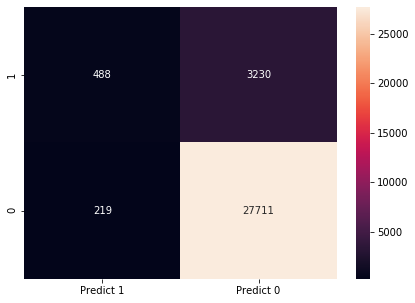

In [127]:
print("Confusion Matrix")
RFcm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
RFcm
df_cm = pd.DataFrame(RFcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

In [128]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.13      0.22      3718
           0       0.90      0.99      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.79      0.56      0.58     31648
weighted avg       0.87      0.89      0.86     31648



In [129]:
RFscore = rfcl.score(X_test, y_test)

In [130]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [RFscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217
0,KNN,0.888176
0,DTree,0.891178
0,Random Forest,0.891020


Accuracy achievable is >89%. Precision score = 69% and recall = 13% for predicting a person would take term deposit indicates that this model is much better than Decision Tree for our current problem. As per our problem greater precision score will help us not to miss out all the candidates who can be converted to take term deposits

# Bagging

In [131]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG =bgcl.predict(X_test)
bgcl.score(X_test , y_test)

0.8850164307381193

In [132]:
predicted_labels = bgcl.predict(X_test)

Confusion Matrix


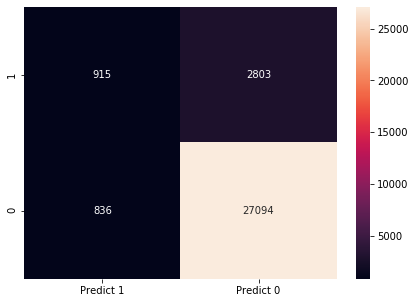

In [133]:
print("Confusion Matrix")
bgcm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
bgcm
df_cm = pd.DataFrame(bgcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for Bagging Classifier
True Positives (TP): we correctly predicted that they will take term deposits 915

True Negatives (TN): we correctly predicted that they wont't take term deposits 27094

False Negatives (FN): we incorrectly predicted that they wont take term deposits 2803

False Positive (FP): we incorrectly predicted that they will take term deposits 836

In [134]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.52      0.25      0.33      3718
           0       0.91      0.97      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.71      0.61      0.64     31648
weighted avg       0.86      0.89      0.87     31648



In [135]:
bgscore = bgcl.score(X_test , y_test)

In [136]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [bgscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217
0,KNN,0.888176
0,DTree,0.891178
0,Random Forest,0.891020
0,Bagging,0.885016


Accuracy achievable is 88.50%. Precision score - 52% and recall - 25% for predicting a person would take term deposit indicates that this model is not as good as Random forest or Decision Tree, but still a good model that needs to worked further to improve the scores

# Adaboosting Model

In [137]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
abcl.score(X_test , y_test)

0.8916835187057633

In [138]:
predicted_labels = abcl.predict(X_test)

Confusion Matrix


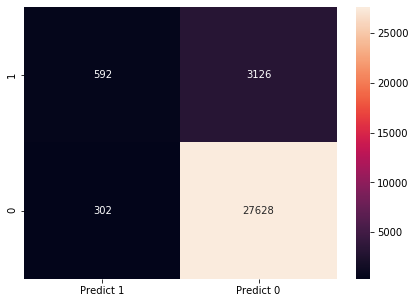

In [139]:
print("Confusion Matrix")
bgcm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
bgcm
df_cm = pd.DataFrame(bgcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for Ada Boosting Classifier
True Positives (TP): we correctly predicted that they will take term deposits 592

True Negatives (TN): we correctly predicted that they wont't take term deposits 27628

False Negatives (FN): we incorrectly predicted that they wont take term deposits 3126

False Positive (FP): we incorrectly predicted that they will take term deposits 302

In [140]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.16      0.26      3718
           0       0.90      0.99      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.78      0.57      0.60     31648
weighted avg       0.87      0.89      0.86     31648



In [141]:
ABscore = abcl.score(X_test, y_test)

In [142]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [ABscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217
0,KNN,0.888176
0,DTree,0.891178
0,Random Forest,0.891020
0,Bagging,0.885016
0,Adaboost,0.891684


Accuracy achievable is 89.16%. Precision score - 66% and recall - 16% for predicting a person would take term deposit indicates that this model is as good as Random forest or Decision Tree

# Gradient Boosting Classifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)
pred_GB =gbcl.predict(X_test)
gbcl.score(X_test , y_test)

0.8911463599595552

In [144]:
predicted_labels = gbcl.predict(X_test)

Confusion Matrix


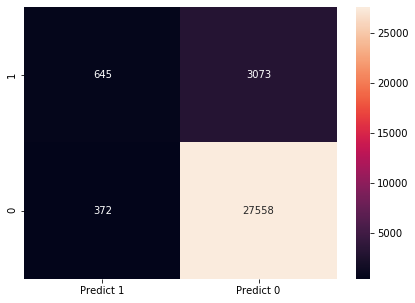

In [145]:
print("Confusion Matrix")
ABcm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])
ABcm
df_cm = pd.DataFrame(ABcm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt ='g')
plt.show()

# The confusion matrix for Gradient Boosting Classifier
True Positives (TP): we correctly predicted that they will take term deposits 645

True Negatives (TN): we correctly predicted that they wont't take term deposits 27558

False Negatives (FN): we incorrectly predicted that they wont take term deposits 3073

False Positive (FP): we incorrectly predicted that they will take term deposits 372

In [146]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.17      0.27      3718
           0       0.90      0.99      0.94     27930

    accuracy                           0.89     31648
   macro avg       0.77      0.58      0.61     31648
weighted avg       0.87      0.89      0.86     31648



In [147]:
GBscore = gbcl.score(X_test, y_test)

In [148]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'accuracy': [GBscore]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

,Method,accuracy
0,Logistic Regression,0.889851
0,Gaussian Naive Bayes,0.565217
0,KNN,0.888176
0,DTree,0.891178
0,Random Forest,0.891020
0,Bagging,0.885016
0,Adaboost,0.891684
0,Gradient Boosting,0.891146


Accuracy achievable is 89.11%. Precision score - 63% and recall - 17% for predicting a person would take term deposit indicates that this model is as good as Random forest or Decision Tree or Ada Boosting

# Summary

1. Out of all the models the top 4 models that be used are (this is ordered by looking at the combinational value of their precision and recall scores)
    a. Random Forest
    b. Ada Boosting
    c. Gradient Boosting
    d. Decision Tree
    
2. Logistic Regression, Bagging, KNN needs to be altered to improve the scores

3. Gaussian Naive Bayes is not recommended